# K-Nearest Neighbors Model

In [1]:
import pandas as pd
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score,
                             f1_score, balanced_accuracy_score)
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [2]:
data_dir = '.' # replace with your own file directory, if needed
X_train = pd.read_pickle('{}/X_train.pkl'.format(data_dir))
X_test = pd.read_pickle('{}/X_test.pkl'.format(data_dir))
y_train = pd.read_pickle('{}/y_train.pkl'.format(data_dir))
y_test = pd.read_pickle('{}/y_test.pkl'.format(data_dir))

In [3]:
X_train.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,diag_3_group_17,diag_3_group_18,diag_3_group_2,diag_3_group_3,diag_3_group_4,diag_3_group_5,diag_3_group_6,diag_3_group_7,diag_3_group_8,diag_3_group_9
0,75,4,39,0,12,0,0,0,9,0,...,0,0,0,0,0,1,0,0,0,0
1,55,9,79,6,30,0,0,0,4,0,...,0,0,0,0,1,0,0,0,0,0
2,75,6,40,4,16,0,0,0,9,0,...,0,0,0,1,0,0,0,0,0,0
3,65,8,72,2,22,0,0,0,9,0,...,0,0,1,0,0,0,0,0,0,0
4,55,3,50,3,23,0,0,0,7,0,...,1,0,0,0,0,0,0,0,0,0


## Define Functions

In [4]:
def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='BuPu')
    plt.show()

In [5]:
def get_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    w_accuracy = balanced_accuracy_score(actual, predicted)
    w_precision = precision_score(actual, predicted, average='weighted')
    w_recall = recall_score(actual, predicted, average='weighted')
    w_f1 = f1_score(actual, predicted, average='weighted')
    
    return pd.Series({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted Accuracy': w_accuracy,
        'Weighted Precision': w_precision,
        'Weighted Recall': w_recall,
        'Weighted F1 Score': w_f1
    })

## Test kNN Model

In [6]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# predict
predicted = model.predict(X_test)

In [7]:
y_train.value_counts()

0    38186
1    38186
Name: readmitted, dtype: int64

In [8]:
y_test.value_counts()

0    25479
1     2511
Name: readmitted, dtype: int64

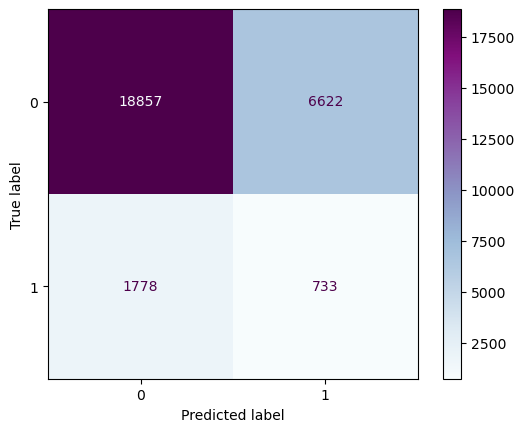

In [9]:
cm_lr = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cm_lr)

In [10]:
print(cm_lr)

[[18857  6622]
 [ 1778   733]]


In [11]:
df_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score',
                                   'Weighted Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'])
df_metrics.loc['kNN'] = get_metrics(y_test, predicted)
df_metrics

,Accuracy,Precision,Recall,F1 Score,Weighted Accuracy,Weighted Precision,Weighted Recall,Weighted F1 Score
kNN,0.699893,0.09966,0.291916,0.148591,0.516008,0.840796,0.699893,0.757804
